<a href="https://colab.research.google.com/github/prateekjoshi2013/data-science/blob/main/Data_Science_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization

There are two primary uses for data visualization:
1. To explore data
2. To communicate data

## Matlpotlib

A wide variety of tools exist for visualizing data. We will be using the matplotlib library, which is widely used (although sort of showing its age).

- If you are interested in producing elaborate interactive visualizations for the web, it is likely not the right choice

- for simple bar charts, line charts, and scatterplots, it works pretty well.

> Although we won’t be using much of this functionality, matplotlib
is capable of producing complicated plots within plots, sophisticated
formatting, and interactive visualizations.


### Pyplot module
- We will be using the matplotlib.pyplot module.
- In its simplest use, pyplot maintains an internal state in which you build up a visualization step by step.
- Once you’re done, you can save it with savefig or display it with show.

#### Line Chart

> These are a good choice for showing trends

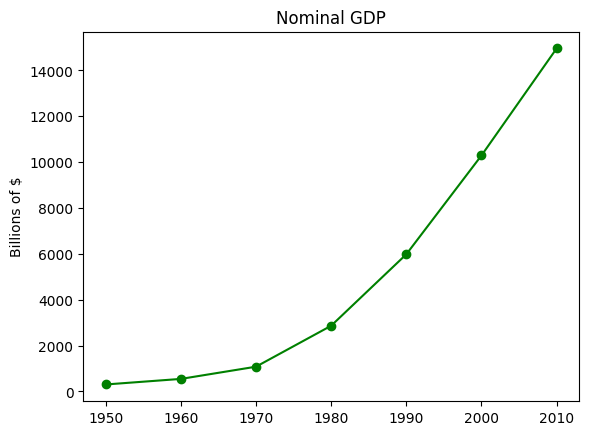

In [ ]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# add a title
plt.title("Nominal GDP")

# add a label to the y-axis
plt.ylabel("Billions of $")
plt.show()

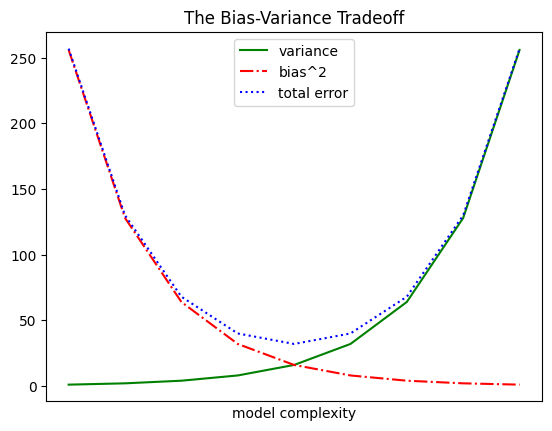

In [ ]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]
# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance, 'g-', label='variance') # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2') # red dot-dashed line
plt.plot(xs, total_error, 'b:', label='total error') # blue dotted line
# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.show()

#### Bar Charts

> A bar chart is a good choice when you want to show how some quantity varies among some discrete set of items.

For instance, Figure shows how many Academy Awards were won by each of a variety of movies:

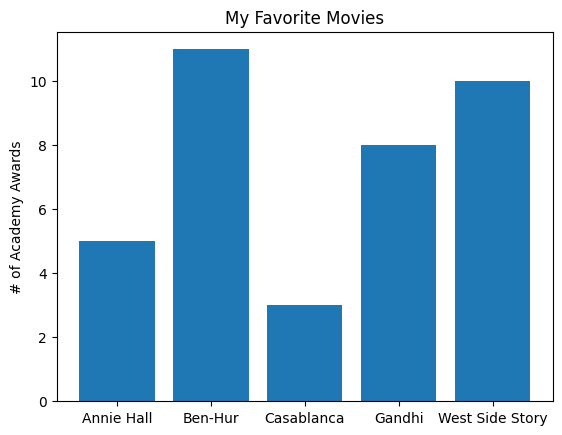

In [ ]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars)

plt.title("My Favorite Movies") # add a title
plt.ylabel("# of Academy Awards") # label the y-axis

# label x-axis with movie names at bar centers
plt.xticks(range(len(movies)), movies)

plt.show()


A bar chart can also be a good choice for plotting histograms of bucketed numeric values, as in Figure, in order to visually explore how the values are distributed:

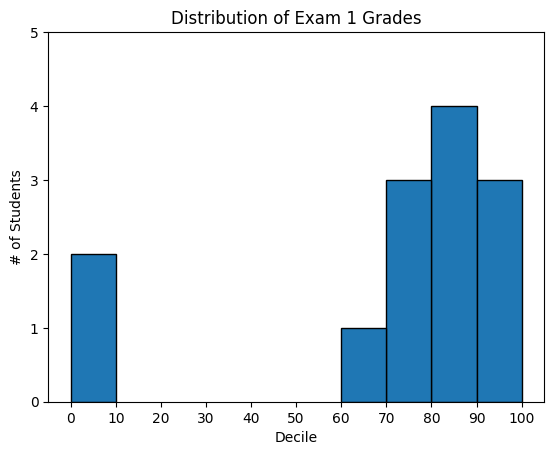

In [ ]:
from collections import Counter
grades=[83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(
      min(grade // 10 * 10, 90) for grade in grades
    )                                       # histogram = Counter({80: 4, 90: 3, 70: 3, 0: 2, 60: 1})

plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 10
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.axis([-5, 105, 0, 5])                   # x-axis from -5 to 105,
                                            # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])     # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

> Be judicious when using plt.axis. When creating bar charts it is considered especially bad form for your y-axis not to start at 0, since this is an easy way to mislead people.

for ex.

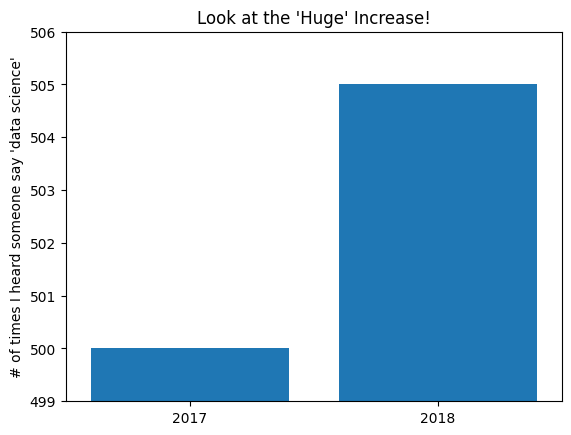

In [ ]:
mentions = [500, 505]
years = [2017, 2018]
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)
# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

> Corrected version with 0 starting y-axis puts the increase in correct context

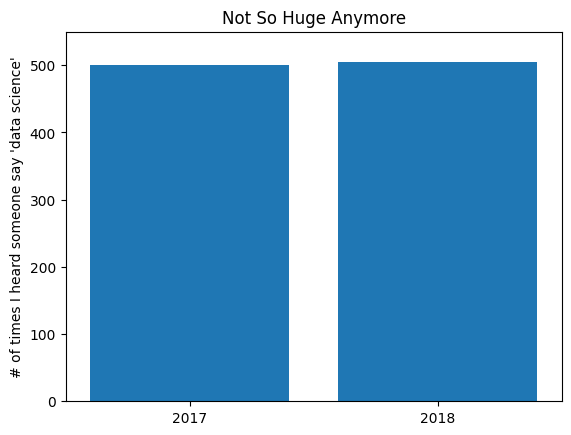

In [ ]:
mentions = [500, 505]
years = [2017, 2018]
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)
plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not So Huge Anymore")
plt.show()


#### Scatterplots

> A scatterplot is the right choice for visualizing the relationship between two paired sets of data.

For example, Figure illustrates the relationship between the number
of friends your users have and the number of minutes they spend on the site every day

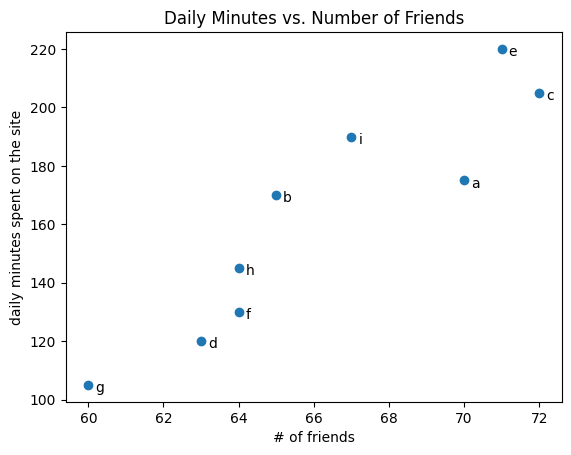

In [ ]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)
# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
  plt.annotate(label,
xy=(friend_count, minute_count),             # Put the label with its point
  xytext=(5, -5),                            # but slightly offset
  textcoords='offset points')
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

> If you’re scattering comparable variables, you might get a misleading picture if you let matplotlib choose the scale

For ex:

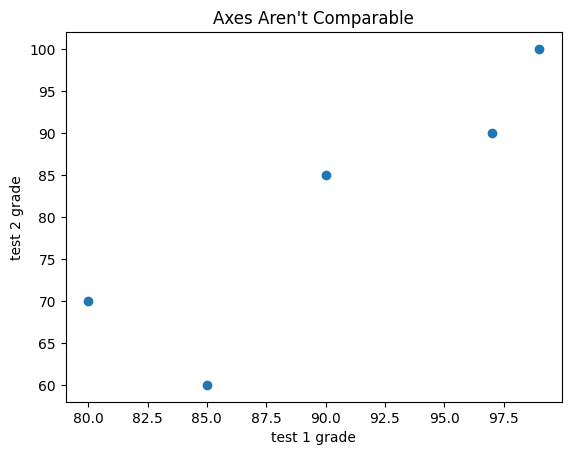

In [ ]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

> **we can make the axes comparible by including a call to plt.axis("equal")**

the plot Figure more accurately shows that most of the variation occurs on test 2

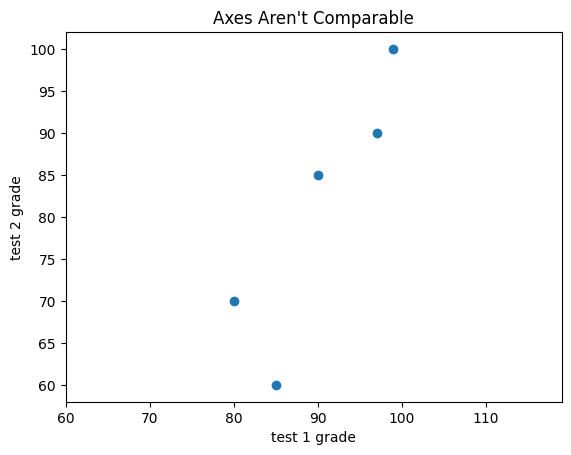

In [ ]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.axis("equal")
plt.show()

## More libraries to explore

- The **matplotlib** Gallery will give you a good idea of the sorts of things you can do with matplotlib (and how to do them).
- **seaborn** is built on top of matplotlib and allows you to easily produce prettier (and more complex) visualizations.
- **Altair** is a newer Python library for creating declarative visualizations.
- **D3.js** is a JavaScript library for producing sophisticated interactive visualizations for the web. Although it is not in Python, it is widely used, and it is well worth your while to be familiar with it.
- **Bokeh** is a library that brings D3-style visualizations into Python.

# Linear Algebra

> Linear algebra is the branch of mathematics that deals with vector spaces.

Abstractly, vectors are objects that can be added together to form new vectors and that can be multiplied by scalars (i.e., numbers), also to form new vectors.
Concretely (for us), vectors are points in some finite-dimensional space.

For example:
- if you have the heights, weights, and ages of a large number of people, we can treat your data as three-dimensional vectors  **[height, weight, age]**.
- a class with four exams, you can treat student grades as fourdimensional vectors **[exam1, exam2, exam3, exam4]**.

In [ ]:
from typing import List
Vector = List[float]
height_weight_age = [70, # inches,
                    170, # pounds,
                    40 ] # years
grades = [95, # exam1
          80, # exam2
          75, # exam3
          62 ] # exam4

## Vector Aritmetic

To perform arithmetic on vectors. Because Python lists aren’t vectors
(and hence provide no facilities for vector arithmetic), we’ll need to build these arithmetic tools ourselves.


### Vector Addition
To begin with, we’ll frequently need to add two vectors.
> Vectors add componentwise.This means that if two vectors v and w are the same length, their sum is just the vector whose first element is v[0] + w[0], whose second element is v[1] + w[1], and so on.
> **(If they’re not the same length, then we’re not allowed to add them.)**

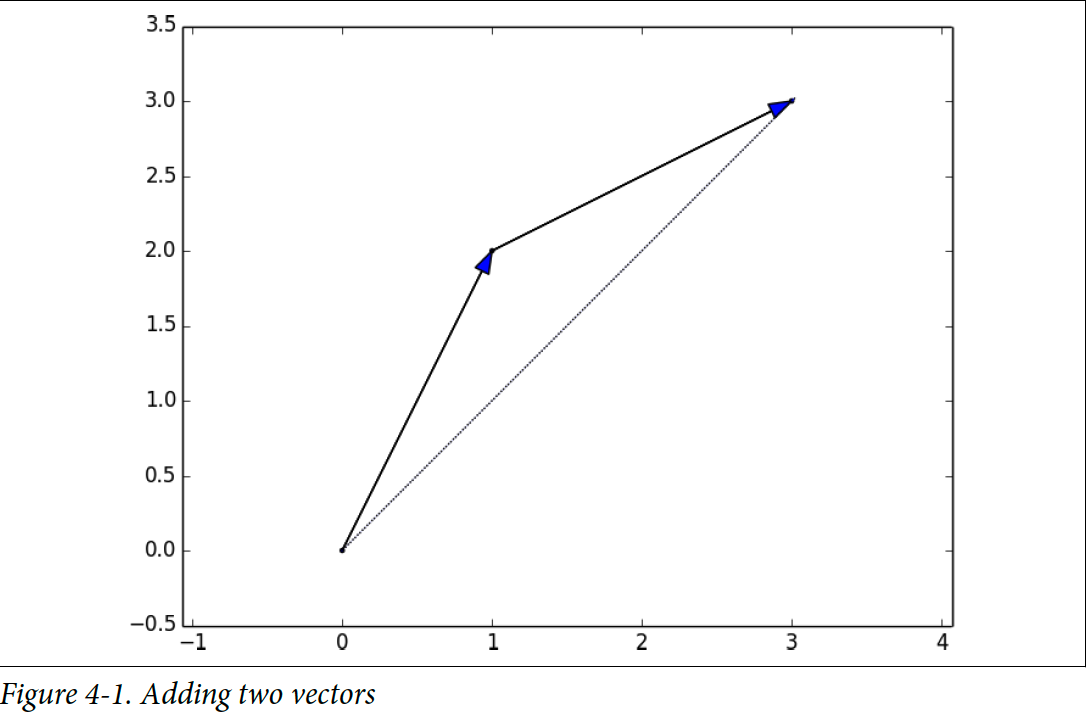


In [ ]:
def add(v: Vector, w: Vector) -> Vector:
  """Adds corresponding elements"""
  assert len(v) == len(w), "vectors must be the same length"
  return [v_i + w_i for v_i, w_i in zip(v, w)]

assert add([1, 2, 3], [4, 5, 6]) == [5, 7, 9]

### Vector Subtract

> to subtract two vectors we just subtract the corresponding elements

In [ ]:
def subtract(v: Vector, w: Vector) -> Vector:
  """Subtracts corresponding elements"""
  assert len(v) == len(w), "vectors must be the same length"
  return [v_i - w_i for v_i, w_i in zip(v, w)]

assert subtract([5, 7, 9], [4, 5, 6]) == [1, 2, 3]

### Vector Sum
> component wise sum a list of vectors—that is, create a new vector whose first element is the sum of all the first elements, whose second element is the sum of all the second elements, and so on:

In [ ]:
def vector_sum(vectors: List[Vector]) -> Vector:
  """Sums all corresponding elements"""

  # Check that vectors is not empty
  assert vectors, "no vectors provided!"

  # Check the vectors are all the same size
  num_elements = len(vectors[0])
  assert all(len(v) == num_elements for v in vectors), "different sizes!"

  # the i-th element of the result is the sum of every vector[i]
  return [ sum(vector[i] for vector in vectors) for i in range(num_elements) ]
  assert vector_sum([[1, 2], [3, 4], [5, 6], [7, 8]]) == [16, 20]

### Scalar Multiplication

> multiply a vector by a scalar, which we do simply by multiplying
each element of the vector by that number:


In [ ]:
def scalar_multiply(c: float, v: Vector) -> Vector:
  """Multiplies every element by c"""
  return [c * v_i for v_i in v]

assert scalar_multiply(2, [1, 2, 3]) == [2, 4, 6]

### Vector Mean

> Allows us to compute the componentwise means of a list of (same-sized) vectors:

In [ ]:
def vector_mean(vectors: List[Vector]) -> Vector:
  """Computes the element-wise average"""
  n = len(vectors)
  return scalar_multiply(1/n, vector_sum(vectors))

assert vector_mean([[1, 2], [3, 4], [5, 6]]) == [3, 4]

### Dot Product

> *Multiply the corresponding components of the two vectors and then sum up the results to get the dot product. The dot product is a scalar quantity, which means it has magnitude but no direction*

The dot product has several important properties:

- **Commutativity**:  A⋅B=B⋅A
- **Distributive over vector addition**:  A⋅(B+C)=A⋅B+A⋅C
- **Scalar multiplication**:  k(A⋅B)=(kA)⋅B=A⋅(kB), where  k is a scalar.
- Orthogonal Vectors: If two vectors are orthogonal (perpendicular) to each other, their dot product is 0.

The dot product has geometric interpretations as well. It's related to the angle between two vectors: when the vectors are parallel, the dot product is positive, and when they are anti-parallel, the dot product is negative. When the vectors are orthogonal, the dot product is 0.

> *In the context of machine learning and statistics, **the dot product is often used to calculate the similarity between vectors**, which is a fundamental concept in various algorithms and techniques.*

In [ ]:
def dot(v: Vector, w: Vector) -> float:
  """Computes v_1 * w_1 + ... + v_n * w_n"""
  assert len(v) == len(w), "vectors must be same length"
  return sum(v_i * w_i for v_i, w_i in zip(v, w))
assert dot([1, 2, 3], [4, 5, 6]) == 32 # 1 * 4 + 2 * 5 + 3 * 6

### Sum of Squares

> - this can be calculated using dot product.
>
> - This is used to calculate magnitude or length of vector

In [ ]:
def sum_of_squares(v: Vector) -> float:
  """Returns v_1 * v_1 + ... + v_n * v_n"""
  return dot(v, v)

assert sum_of_squares([1, 2, 3]) == 14 # 1 * 1 + 2 * 2 + 3 * 3

### Magnitude or Length



In [ ]:
import math
def magnitude(v: Vector) -> float:
  """Returns the magnitude (or length) of v"""
  return math.sqrt(sum_of_squares(v)) # math.sqrt is square root function

assert magnitude([3, 4]) == 5

### Squared Distance between two vectors

In [ ]:
def squared_distance(v: Vector, w: Vector) -> float:
  """Computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
  return sum_of_squares(subtract(v, w))

### Distance between two vectors

In [ ]:
def distance(v: Vector, w: Vector) -> float:
  """Computes the distance between v and w"""
  return math.sqrt(squared_distance(v, w))

## Numpy Library

> Using lists as vectors is great for exposition but terrible for performance.
In production code, you would want to use the NumPy library,
which includes a high-performance array class with all sorts of
arithmetic operations included.

# Matrices

> A matrix is a two-dimensional collection of numbers. We will represent matrices as lists of lists, with each inner list having the same size and representing a row of the matrix.

In [ ]:
Matrix = List[List[float]] # type annotation
A=[[1,2,3], # A has 2 rows and 3 columns
  [4,5,6]]

B=[[1,2],   # B has 3 rows and 2 columns
   [3,4],
   [5,6]]


### Shape
Given this list-of-lists representation, the matrix A has len(A) rows and len(A[0]) columns, which we consider its shape:

In [ ]:
from typing import Tuple

def shape(A: Matrix) -> Tuple[int,int]:
  """Returns (# of rows of A, # of columns of A)"""
  num_rows = len(A)
  num_cols = len(A[0]) if A else 0 # number of elements in first row
  return num_rows, num_cols

assert shape([[1, 2, 3], [4, 5, 6]]) == (2, 3) # 2 rows, 3 columns


### Row

Gets the ith row

In [ ]:
def get_row(A: Matrix, i: int) -> Vector:
  """Returns the i-th row of A (as a Vector)"""
  return A[i] # A[i] is already the ith row

### Column

Gets the ith column

In [ ]:
def get_column(A: Matrix, j: int) -> Vector:
  """Returns the j-th column of A (as a Vector)"""
  return [A_i[j] # jth element of row A_i
          for A_i in A] # for each row A_i

### Create

> Create a matrix given its shape and a function for generating its elements.
>
> We can do this using a nested list comprehension

In [ ]:
from typing import Callable

def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
  """
  Returns a num_rows x num_cols matrix
  whose (i,j)-th entry is entry_fn(i, j)
  """
  return [[entry_fn(i, j) # given i, create a list
          for j in range(num_cols)] # [entry_fn(i, 0), ... ]
          for i in range(num_rows)] # create one list for each i

### Identity Matrix

> It is a special square matrix that, when multiplied with another matrix, leaves the other matrix unchanged. In other words, the identity matrix acts as a multiplicative identity in matrix multiplication, much like the number 1 in regular multiplication.

In [ ]:
def identity_matrix(n: int) -> Matrix:
  """Returns the n x n identity matrix"""
  return make_matrix(n, n, lambda i, j: 1 if i == j else 0)

assert identity_matrix(5) == [[1, 0, 0, 0, 0],
                              [0, 1, 0, 0, 0],
                              [0, 0, 1, 0, 0],
                              [0, 0, 0, 1, 0],
                              [0, 0, 0, 0, 1]]

# Statistics



## Describing a single set of data

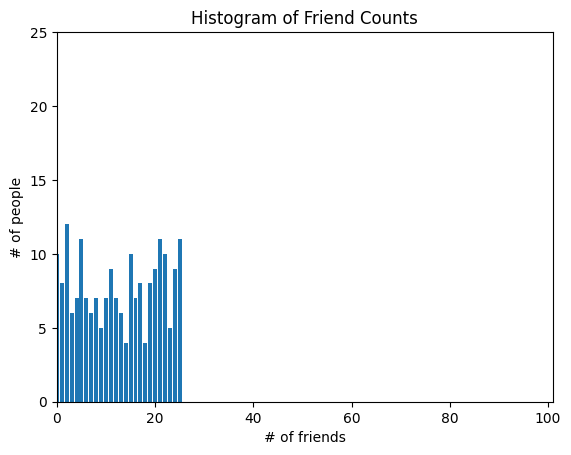

In [ ]:

from collections import Counter
from random import choice
import matplotlib.pyplot as plt


num_friends = [choice(range(26)) for _ in range(204)] # generating random number of friends
daily_minutes=[choice(range(60)) for _ in range(204)] # generating random daily_minutes of friends
friend_counts = Counter(num_friends)
xs = range(101) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()


Unfortunately, this chart is still too difficult to slip into conversations. So you start generating some statistics. Probably the simplest statistic is the number of data points:

In [ ]:
num_points = len(num_friends)

You’re probably also interested in the largest and smallest values:

In [ ]:
largest_value = max(num_friends)
smallest_value = min(num_friends)

which are just special cases of wanting to know the values in specific positions:

In [ ]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

### Central Tendencies

We will want some notion of where our data is centered. Most commonly we'll
use the mean (or average), which is just the sum of the data divided by its count:

#### Mean

> - We will want some notion of where our data is centered.
> - Most commonly we'll use the mean (or average), which is just the sum of the data divided by its count
> - the mean shifts around, but it always depends on the value of every point.
> - **the mean is very sensitive to outliers in our data.**

> If outliers are likely to be bad data (or otherwise unrepresentative
of whatever phenomenon we're trying to understand), then the mean can
sometimes give us a misleading picture. For example, the story is often told that in the mid-1980s, the major at the University of North Carolina with the highest average starting salary was geography, mostly because of NBA star (and outlier) Michael Jordan.

For example, if you have 10 data points, and you increase the value of any of them by 1, you increase the mean by 0.1.

In [ ]:
def mean(xs: List[float]) -> float:
  return sum(xs) / len(xs)

mean(num_friends) #

12.568627450980392

#### Median

Median, which is the middle-most value (if the number of data points is odd) or the average of the two middle-most values (if the number of data points is even).

For instance:
- if we have five data points in a sorted vector x, the median is x[5 // 2] or x[2].
- If we have six data points, we want the average of x[2] (the third point) and
x[3] (the fourth point).

> Notice that—unlike the mean—the median doesn’t fully depend on every value in
your data.
For example, if you make the largest point larger (or the smallest point smaller), the middle points remain unchanged, which means so does the median

In [ ]:
# The underscores indicate that these are "private" functions, as they're
# intended to be called by our median function but not by other people
# using our statistics library.

def _median_odd(xs: List[float]) -> float:
  """If len(xs) is odd, the median is the middle element"""
  return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
  """If len(xs) is even, it's the average of the middle two elements"""
  sorted_xs = sorted(xs)
  hi_midpoint = len(xs) // 2 # e.g. length 4 => hi_midpoint 2
  return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
  """Finds the 'middle-most' value of v"""
  return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

#### Quantile

> A generalization of the median is the quantile, which represents the value under which a certain percentile of the data lies (the median represents the value under which 50% of the data lies)



In [ ]:
def quantile(xs: List[float], p: float) -> float:
  """Returns the pth-percentile value in x"""
  p_index = int(p * len(xs))
  return sorted(xs)[p_index]

print('value under which 10% of data lies','->',quantile(num_friends, 0.10))
print('value under which 25% of data lies','->',quantile(num_friends, 0.25))
print('value under which 75% of data lies','->',quantile(num_friends, 0.75))
print('value under which 90% of data lies','->',quantile(num_friends, 0.90))

value under which 10% of data lies -> 2
value under which 25% of data lies -> 5
value under which 75% of data lies -> 20
value under which 90% of data lies -> 23


#### Mode

> mode is the most common value(s)

In [ ]:
def mode(x: List[float]) -> List[float]:
  """Returns a list, since there might be more than one mode"""
  counts = Counter(x)
  max_count = max(counts.values())
  return [x_i for x_i, count in counts.items() if count == max_count]

print(mode(num_friends))


[2]


### Dispersion

> Dispersion refers to measures of how spread out our data is. Typically they're statistics for which values near zero signify not spread out at all and for which large values (whatever that means) signify very spread out.

#### Range
> A very simple measure is the range, which is just the difference between the largest and smallest elements

In [ ]:
# "range" already means something in Python, so we'll use a different name
def data_range(xs: List[float]) -> float:
  return max(xs) - min(xs)

print(data_range(num_friends))

25


#### Variance

Sample Variance: **(s^2) = Sum of [(x_i - x̄)^2] / (n - 1)**

> Dividing by n−1 instead of n helps correct the bias introduced by using the sample mean as an estimate of the population mean.
> This adjustment accounts for the fact that when using the sample mean, we have one less degree of freedom to estimate the population variance, which results in a better estimate for the variability in the population.



In [ ]:
def de_mean(xs: List[float]) -> List[float]:
  """Translate xs by subtracting its mean (so the result has mean 0)"""
  x_bar = mean(xs)
  return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
  """Almost the average squared deviation from the mean"""
  assert len(xs) >= 2, "variance requires at least two elements"
  n = len(xs)
  deviations = de_mean(xs)
  return sum_of_squares(deviations) / (n - 1)

print('Variance ->',variance(num_friends))


Variance -> 63.04452815609004


#### Standard Deviation

> The variance, has units that are the square of the original units (e.g.,
“friends squared”). As it can be hard to make sense of these, we often look instead at the **standard deviation which is square root of variance**
>
> **Both the range and the standard deviation have the same outlier problem that we saw earlier for the mean.**

In [ ]:
import math
def standard_deviation(xs: List[float]) -> float:
  """The standard deviation is the square root of the variance"""
  return math.sqrt(variance(xs))

print('Standard Deviation ->',standard_deviation(num_friends))

Standard Deviation -> 7.940058447901378


#### Interquartile Range
> Both the range and the standard deviation have the same outlier problem that we saw earlier for the mean.**A more robust alternative computes the difference between the 75th percentile value and the 25th percentile value**


> ***A quantile is a general term that refers to any value that divides a dataset into specific segments.Whereas Quartiles are a specific type of quantile that divide a dataset into four equal parts. They are used to understand the spread and distribution of data in terms of quarters (25%,50%,75%)***




In [ ]:
def interquartile_range(xs: List[float]) -> float:
  """Returns the difference between the 75%-ile and the 25%-ile"""
  return quantile(xs, 0.75) - quantile(xs, 0.25)

print("Interquartile Range ->",interquartile_range(num_friends))


Interquartile Range -> 15


## Covariance

> Variance measures how a single variable deviates from its mean, **covariance measures how two variables vary in tandem from their means**

>The resulting value of Cov(X, Y) can be interpreted as follows:
>- If **Cov(X, Y) > 0:** X and Y tend to increase together (positive correlation).
>- If **Cov(X, Y) < 0:** X tends to increase as Y decreases, and vice versa (negative >correlation).
>- If **Cov(X, Y) ≈ 0:** There is little to no linear relationship between X and Y(no correlation).

>>For two vectors, let's call them X and Y, each containing n elements:
>>
>>X = [X₁, X₂, X₃, ..., Xₙ]
>>Y = [Y₁, Y₂, Y₃, ..., Yₙ]
>>
>>The covariance between X and Y is calculated as follows:
>>
>>>>**Cov(X, Y) = Σ((Xᵢ - X̄) * (Yᵢ - Ȳ)) / (n - 1)**
>>
>>Where:
>>>>Xᵢ and Yᵢ are the individual elements at the i-th position in X and Y
>>>>respectively.
>>>>X̄ and Ȳ are the means of X and Y respectively.
>>>>n is the number of elements in the vectors.
>>
>> this number can be hard to interpret, for a couple of reasons:
>>- **Different Scales:** Covariance is affected by the scale of the variables.If one variable has a much larger scale than the other, its variations will dominate the covariance calculation.
>>- **Outliers:** Covariance is sensitive to outliers, which are extreme values that deviate significantly from the rest of the data. A single outlier can disproportionately influence the covariance
>>- **Nonlinear Relationships:** Covariance only measures linear relationships between variables. If the relationship between the variables is nonlinear, the covariance might not accurately capture the underlying pattern.
>>- **Data Range:** If the data points are limited in range, the covariance might not capture the true relationship between the variables. For example, if both variables have a restricted range, the covariance might be small even if there is a strong relationship outside that range.
>>- **Dependence on Sample Size:** Covariance is calculated based on a sample of data points. The larger the sample size, the more reliable the covariance estimate becomes. However, with smaller sample sizes, the calculated covariance might not accurately reflect the population's true covariance.
>>- **Mean-Centered Data:** The calculation of covariance involves centering the data by subtracting the means. While this is important for the mathematical properties of covariance, it can lead to interpretation issues.The magnitude of the covariance can change if the means are shifted, even if the relationship between the variables remains the same.




In [ ]:

def covariance(xs: List[float], ys: List[float]) -> float:
  assert len(xs) == len(ys), "xs and ys must have same number of elements"
  return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

print("covariance between num_friends and daily_minutes" ,covariance(num_friends, daily_minutes))


covariance between num_friends and daily_minutes -4.258186033033903


## Correlation

> Correlation is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. Unlike covariance,correlation is normalized, meaning **it's scaled to always fall between -1 and 1**, which makes it a more standardized and interpretable measure of association.

> Pearson Correlation Coefficient (r) = Cov(X, Y) / (σₓ * σᵧ)
>
>>>Where:
>>>
>>>- **Cov(X, Y) is the covariance between X and Y**.
>>>- **σₓ is the standard deviation of X**.
>>>- **σᵧ is the standard deviation of Y**.

> The Pearson correlation coefficient ranges from -1 to 1:
> - **r = 1** indicates a perfect positive linear relationship: as X increases, Y also increases in a consistent manner.
> - **r = -1** indicates a perfect negative linear relationship: as X increases, Y decreases in a consistent manner.
> - **r ≈ 0** indicates little to no linear relationship between X and Y.
> **The closer r is to 1 or -1, the stronger the linear relationship, and the closer it is to 0, the weaker the linear relationship.**

>>>Key points to remember about correlation:
>>>
>>>**Normalization**: Correlation normalizes the covariance by dividing it by the product of the standard deviations of the variables. This normalization eliminates the scale of the variables and allows for better comparison across different datasets.
>>>
>>>**Range and Interpretation**: The range of correlation is always between -1 and 1, making it easier to interpret compared to covariance. Positive values indicate a positive relationship, negative values indicate a negative relationship, and values close to 0 indicate a weak or no linear relationship.
>>>
>>>**Linearity Assumption**: Correlation measures only linear relationships between variables. If the relationship is nonlinear, correlation might not accurately capture the association between the variables.
>>>
>>>**Influence of Outliers**: While correlation is less influenced by outliers than covariance, **extreme outliers can still impact correlation, especially in smaller datasets**.
>>>
>>>**Correlation ≠ Causation**: A high correlation between two variables does not necessarily imply a causal relationship. Correlation only indicates that the variables tend to change together, but it doesn't establish the direction of influence or any cause-and-effect relationship.
>>>
>>>**Partial Correlation**: In more complex analyses, researchers might use partial correlation to assess the relationship between two variables while controlling for the effects of other variables.



In [ ]:
def correlation(xs: List[float], ys: List[float]) -> float:
  """Measures how much xs and ys vary in tandem about their means"""
  stdev_x = standard_deviation(xs)
  stdev_y = standard_deviation(ys)
  if stdev_x > 0 and stdev_y > 0:
    return covariance(xs, ys) / stdev_x / stdev_y
  else:
    return 0 # if no variation, correlation is zero

print("correlation between num_friends and daily_minutes" ,correlation(num_friends, daily_minutes))

correlation between num_friends and daily_minutes -0.03033667420843084


### Simpson's Paradox

Simpson’s paradox, in which correlations can be misleading when confounding variables are ignored.

Imagine a pharmaceutical company testing the effectiveness of a new drug for treating a medical condition. The company conducts two separate clinical trials:

>Trial 1:
>
>>> - Group A (Drug): 90 out of 100 patients show improvement (**90% success rate**).
>>> - Group B (Placebo): 60 out of 100 patients show improvement (**60% success rate**).
>
>Trial 2:
>
>>> - Group A (Drug): 20 out of 30 patients show improvement (**66.7% success rate**).
>>> - Group B (Placebo): 40 out of 70 patients show improvement (**57.1% success rate**).
>
>>> In both trials, it appears that the drug has a higher success rate than the placebo. However, when you combine the data from both trials:
>>>
>>> - Group A (Drug): 110 out of 130 patients show improvement (**84.6% success rate**).
>>> - Group B (Placebo): 100 out of 170 patients show improvement (**58.8% success rate**).
>
>Now the paradox emerges: **Although the drug seems to have a higher success rate within each trial, it appears to have a lower success rate overall when the data is combined.**
>
>>> - The explanation for this paradox lies in the varying sizes of the groups in each trial. The second trial, with smaller sample sizes, has a higher success rate for both the drug and the placebo. When combined with the larger first trial, where the drug's success rate is higher, the overall success rate for the drug becomes lower.
>
>>> - In this example, **the size of the trials is the confounding variable that affects both the treatment's success rate and the overall outcome**. Simpson's Paradox illustrates that drawing conclusions without considering the influence of confounding variables can lead to misleading interpretations of the data.
>
> **The only real way to avoid this is by knowing your data and by doing what you can to make sure you've checked for possible confounding factors This phenomenon highlights the importance of careful analysis, considering potential confounders, and understanding the underlying factors that can influence the relationships between variables**. In real-world scenarios, Simpson's Paradox can have significant implications, particularly in fields such as medical research, social sciences, and economics.







### Linearity Assumption

> A correlation of zero indicates that there is no linear relationship between the two variables. However, there may be other sorts of relationships. For example, if:

>>>>>x = [-2, -1, 0, 1, 2]
>>>>>y = [ 2, 1, 0, 1, 2]

>>> **x and y have zero correlation**. But they certainly have a relationship,

>**Each element of y equals the absolute value of the corresponding element of x. What they don't have is a relationship in which knowing how x_i compares to mean(x) gives us information about how y_i compares to mean(y). That is the sort of relationship that correlation looks for**.

### Correlation ≠ Causation

>> if x and y are strongly correlated, that might mean that
>>> - **x causes y**,
>>> - **that y causes x**,
>>> - **that each causes the other**,
>>> - **that some third factor causes both, or nothing at all**.

>> **Consider the relationship between num_friends and daily_minutes. **

>>> - It's possible that having more friends on the site causes DataSciencester users to spend more time on the site. This might be the case if each friend posts a certain amount of content each day, which means that the more friends you have, the more time it takes to stay current with their updates.

>>> - However, it's also possible that the more time users spend arguing in the Data Science forums, the more they encounter and befriend like-minded people. That is, spending more time on the site causes users to have more friends.

>>> - A third possibility is that the users who are most passionate about data science spend more time on the site (because they find it more interesting) and more actively collect data science friends (because they don’t want to associate with anyone else).

>>**One way to feel more confident about causality is by conducting randomized trials. If you can randomly split your users into two groups with similar demographics and give one of the groups a slightly different experience, then you can often feel pretty good that the different experiences are causing the different outcomes.**

## For Further Exploration
- SciPy, pandas, and StatsModels all come with a wide variety of statistical functions.
- Statistics is important. (Or maybe statistics are important?) If you want to be a better data scientist, it would be a good idea to read a statistics textbook. Many are freely available online, including:
Correlation and Causation | 69
- Introductory Statistics, by Douglas Shafer and Zhiyi Zhang (Saylor Foundation)
- OnlineStatBook, by David Lane (Rice University)
- Introductory Statistics, by OpenStax (OpenStax College)
